In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Temporal Series - Daily Cases (new and accumulated)

In [2]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [3]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-07-25,55.0,67.0,605.0,0.0,36.0,0.0,4814.0,383.0,453.0,124.0,...,770.0,8.0,592.0,666.0,2.0,213.0,0.0,0.0,472.0,138.0
2020-07-26,121.0,126.0,593.0,0.0,16.0,0.0,4192.0,321.0,532.0,134.0,...,750.0,18.0,579.0,534.0,3.0,163.0,0.0,7.0,153.0,78.0
2020-07-27,106.0,117.0,616.0,10.0,18.0,4.0,4890.0,73.0,368.0,86.0,...,688.0,10.0,678.0,525.0,11.0,152.0,0.0,10.0,71.0,192.0
2020-07-28,105.0,117.0,642.0,0.0,50.0,0.0,5939.0,239.0,279.0,119.0,...,553.0,16.0,490.0,583.0,15.0,317.0,0.0,12.0,450.0,113.0
2020-07-29,103.0,108.0,614.0,11.0,78.0,5.0,5641.0,308.0,716.0,173.0,...,802.0,19.0,886.0,587.0,13.0,346.0,0.0,8.0,247.0,62.0


#### Countries with the biggest numbers of cases in the last day

In [35]:
df_daily_cases.tail().iloc[0].nlargest(10)

Country/Region
US              66439.0
Brazil          51147.0
India           48611.0
South Africa    12204.0
Colombia         7254.0
Mexico           6751.0
Russia           5833.0
Argentina        4814.0
Iraq             2862.0
Bangladesh       2520.0
Name: 2020-07-25 00:00:00, dtype: float64

In [5]:
countries_observed = ["US", 
                      "Brazil", 
                      "Austria", 
                      "Spain",
                      "France",
                      #"Portugal",
                      "Russia",
                      #"China",
                      "India",
                      "Italy",
                     ]

### New Cases (moving average, 7 days)

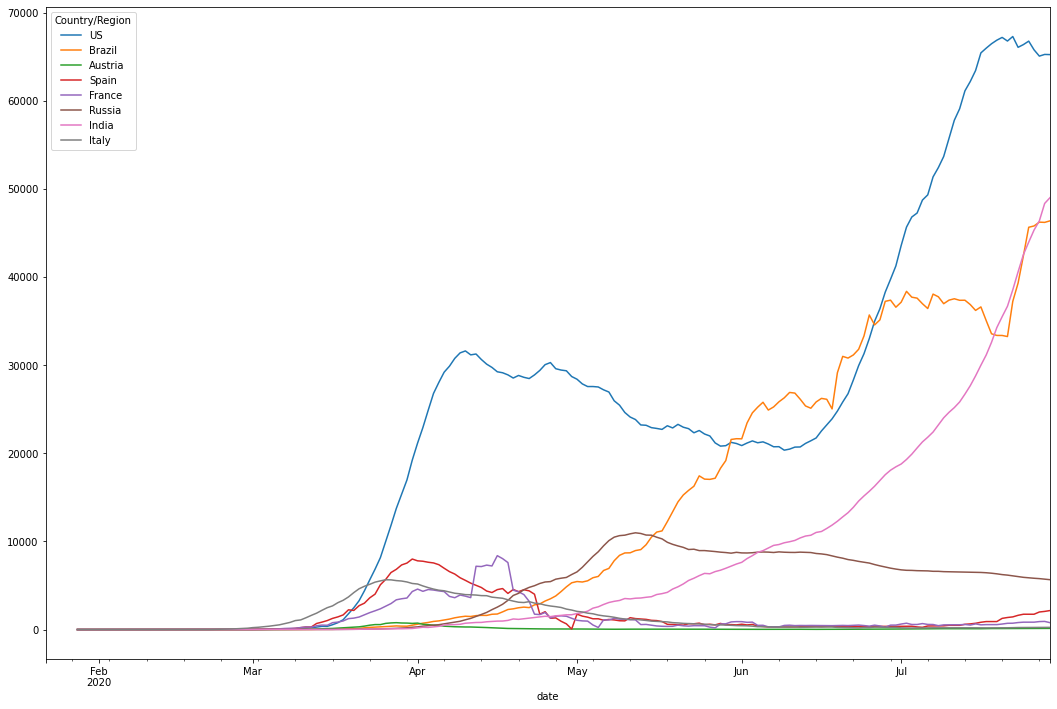

In [6]:
df_daily_cases[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Cases (log)

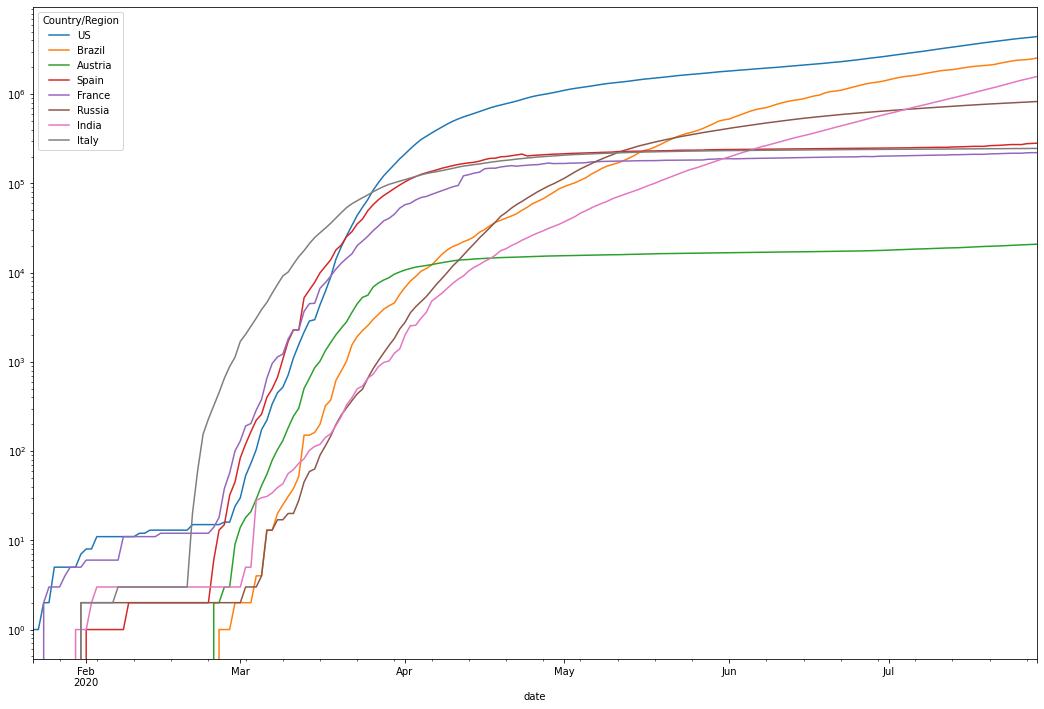

In [7]:
df_cases[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [8]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-07-25,1248,134,1146,52,39,3,2893,700,155,712,...,45823,34,111,138,0,75,1,474,139,34
2020-07-26,1259,138,1155,52,40,3,2939,705,161,712,...,45837,34,116,142,0,76,1,479,139,34
2020-07-27,1269,144,1163,52,41,3,3059,711,167,713,...,45844,35,121,146,0,78,1,483,140,36
2020-07-28,1270,148,1174,52,47,3,3179,719,176,713,...,45963,35,124,151,0,79,1,484,142,40
2020-07-29,1271,150,1186,52,48,3,3288,723,189,716,...,46046,35,131,156,0,80,1,485,146,41


#### Countries with the biggest numbers of deaths in the last day

In [9]:
df_deaths.tail().iloc[0].nlargest(10)

Country/Region
US                146465
Brazil             86449
United Kingdom     45823
Mexico             42645
Italy              35102
India              32060
France             30195
Spain              28432
Peru               17843
Iran               15484
Name: 2020-07-25 00:00:00, dtype: int64

In [10]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-07-25,905.0,1211.0,1.0,0.0,0.0,146.0,702.0,5.0
2020-07-26,470.0,555.0,0.0,0.0,0.0,77.0,711.0,5.0
2020-07-27,1077.0,614.0,1.0,2.0,17.0,85.0,637.0,5.0
2020-07-28,1298.0,921.0,0.0,2.0,14.0,149.0,785.0,11.0
2020-07-29,1403.0,1595.0,3.0,5.0,0.0,167.0,762.0,6.0


### New Deaths (moving average, 7 days)

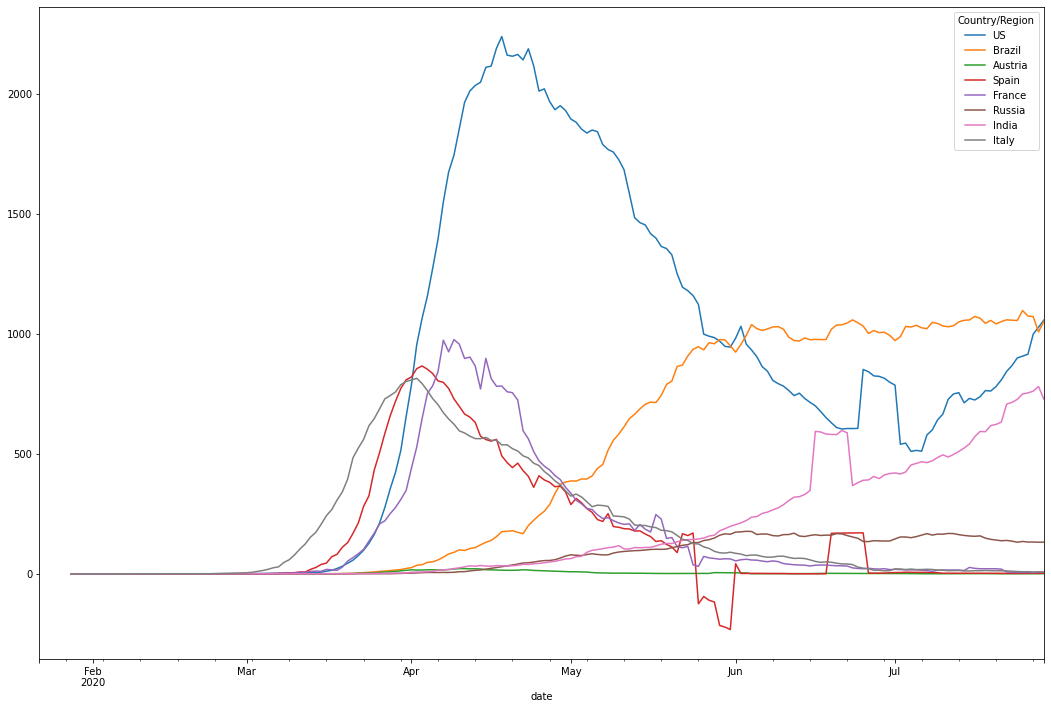

In [11]:
df_daily_deaths[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Deaths (log)

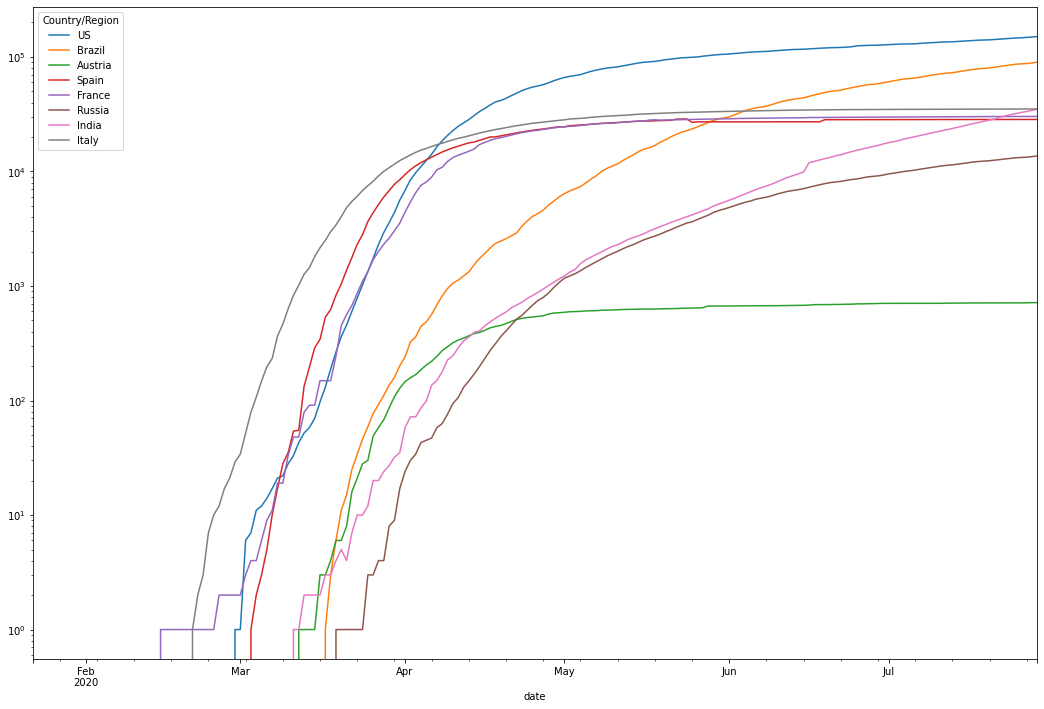

In [12]:
df_deaths[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [13]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)

# fixing error in the original series
df_recovered.loc["2020-03-17","Austria"] = 8 
df_recovered.loc["2020-02-23","Italy"] = 1

df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-07-25,17790.0,92145.0,82.0,0.0,2.0,8336.0,36141.0,128.0
2020-07-26,18449.0,27554.0,85.0,0.0,0.0,3108.0,31995.0,126.0
2020-07-27,27941.0,33728.0,37.0,0.0,267.0,3077.0,33598.0,147.0
2020-07-28,29559.0,22108.0,133.0,0.0,229.0,8860.0,36863.0,163.0
2020-07-29,34062.0,54053.0,149.0,0.0,2.0,8095.0,31706.0,275.0


### New Recovered (moving average, 7 days)

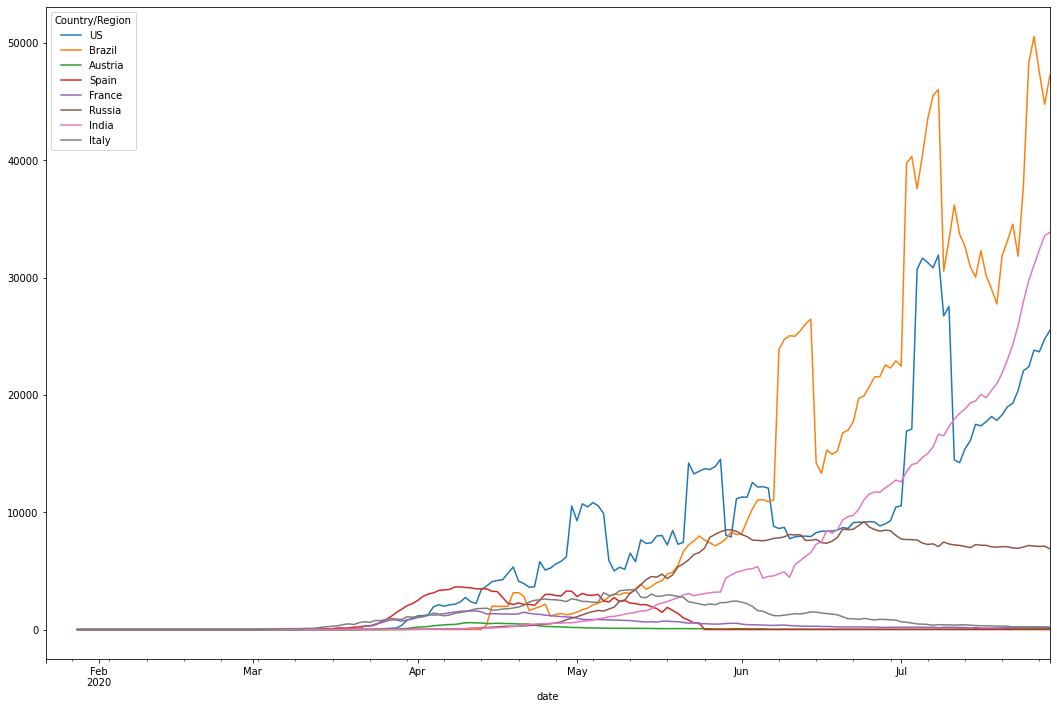

In [15]:
df_daily_recovered[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Recovered (log)

In [16]:
df_recovered.loc["2020-02-23","Italy"] = 1

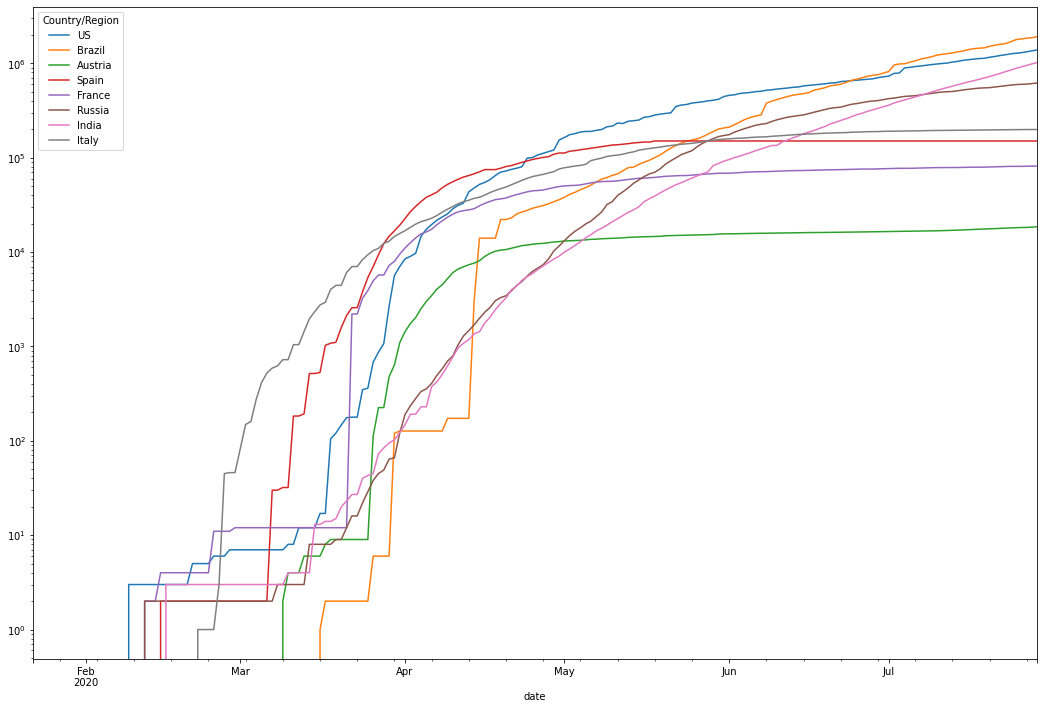

In [17]:
df_recovered[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [18]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [19]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [20]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [21]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [22]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [23]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [24]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [25]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [26]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [27]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [28]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [29]:
# Aligninig names of countries (e.g US and United States)
df_wp.loc[2, 'Country (or dependency)'] = 'US'
cop = df_wp.loc[df_wp["Country (or dependency)"].isin(countries_observed)][["Country (or dependency)",
                                                                                                "Population (2020)"]]
cop

,Country (or dependency),Population (2020)
1,India,1.380004e+09
2,US,3.310027e+08
5,Brazil,2.125594e+08
8,Russia,1.459345e+08
21,France,6.527351e+07
22,Italy,6.046183e+07
29,Spain,4.675478e+07
96,Austria,9.006398e+06


In [30]:
pops = []
for country in countries_observed:
    p = cop[cop['Country (or dependency)'] == country]['Population (2020)'].values[0]
    pops.append(p)

## Temporal Series - Cumulative Cases per Population

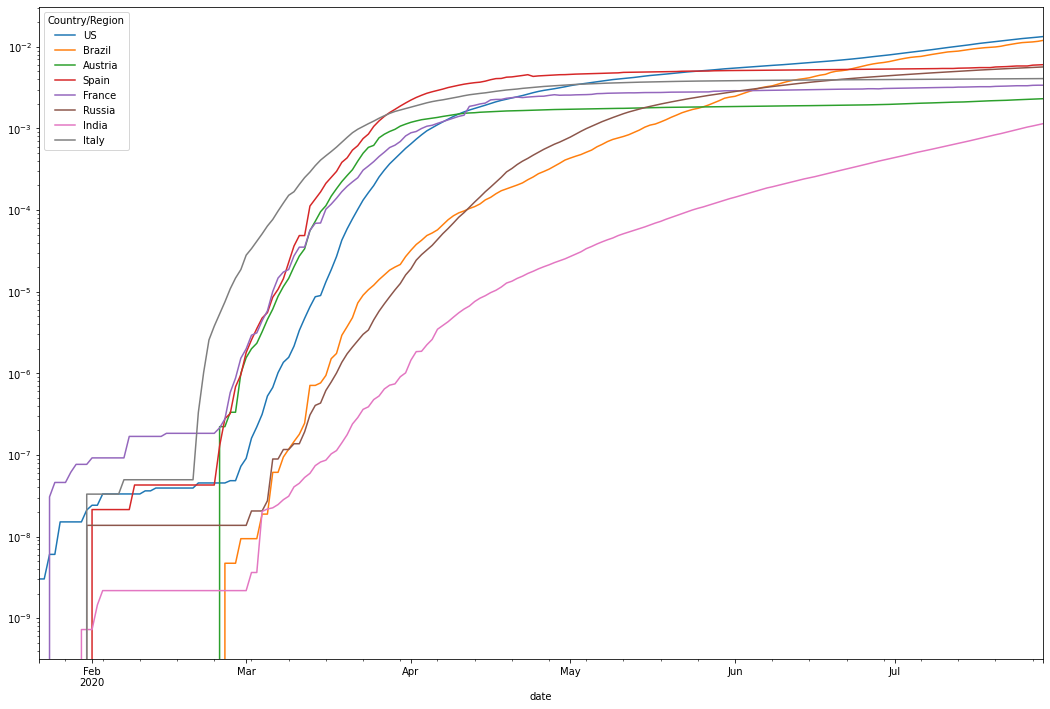

In [31]:
df_cases[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

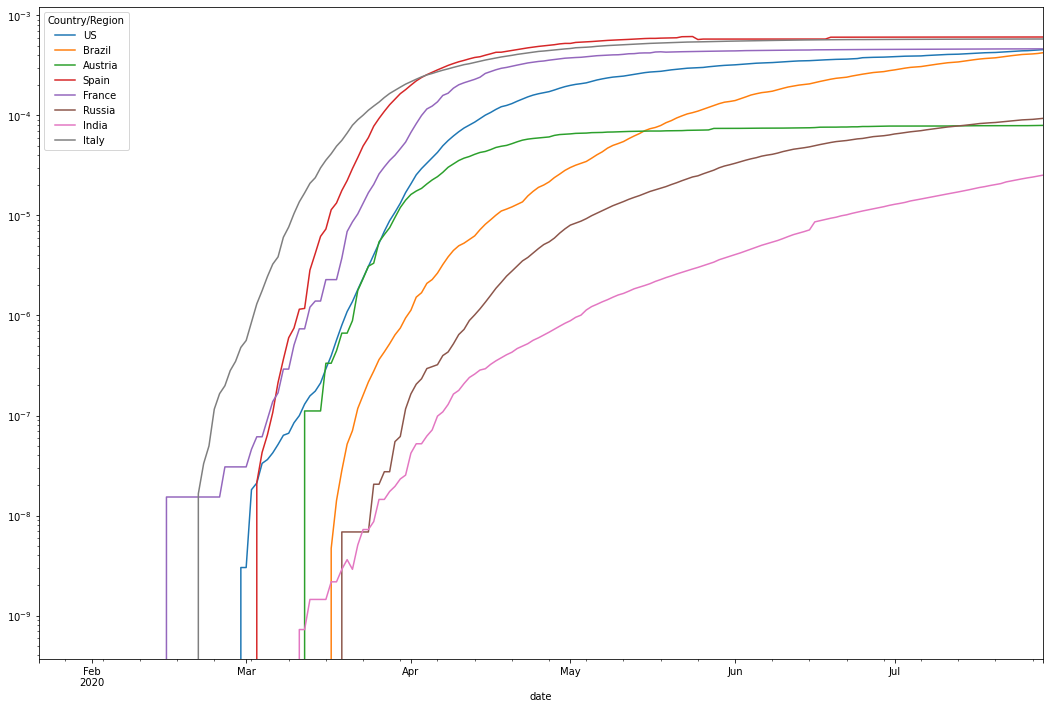

In [32]:
df_deaths[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

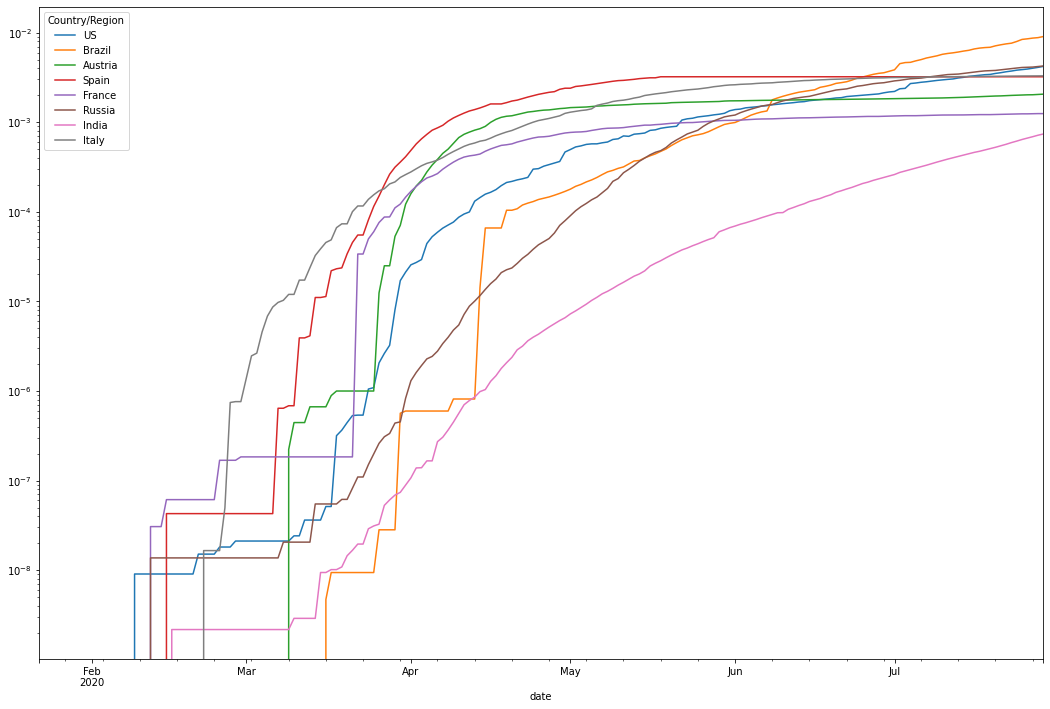

In [33]:
df_recovered[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()